Student Performance Indicator

1. Problem Statement: This project understands how the student performance (test scores) is affected by other variables  such as Gender, Ethnicity, Parental level of Education, Lunch and Test Prepration.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import data and Read CSV

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

Showing top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Our dataset has total of 8 columns and total of 1000 rows.

Checks to be performed on Data
 1. Missing values
 2. Duplicates
 3. data Type
 4. Number of Unique values in each column
 5. Statistics of dataset
 6. Various categories present in the different categorical column.

Checking Missing/ Nulls existance in data.

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no nulls present in data.

In [7]:
df.duplicated().sum()

0

There are no duplicates in data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Our data contains both numerical and categorical columns

Checking number of unique values in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Checking statistics of data

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [12]:
print("Categories in 'gender' columns:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' columns:   ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' columns:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' columns:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test prepration course' columns:   ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' columns:    ['female' 'male']
Categories in 'race/ethnicity' columns:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' columns:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' columns:    ['standard' 'free/reduced']
Categories in 'test prepration course' columns:    ['none' 'completed']


In [13]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding Columns for Total Score and Average

In [14]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading score']==100]['average'].count()
print(f'Number of student with full marks in reading: {reading_full}')
writing_full = df[df['writing score']==100]['average'].count()
print(f'Number of student with full marks in writing: {writing_full}')
math_full = df[df['math score']==100]['average'].count()
print(f'Number of student with full marks in maths: {math_full}')

Number of student with full marks in reading: 17
Number of student with full marks in writing: 14
Number of student with full marks in maths: 7


In [16]:
reading_less_20 = df[df['reading score'] <=20]['average'].count()
writing_less_20 = df[df['writing score'] <=20]['average'].count()
math_less_20 = df[df['math score'] <=20]['average'].count()

print(f'Number of students with marks less than 20 in reading: {reading_less_20}')
print(f'Number of students with marks less than 20 in writing: {writing_less_20}')
print(f'Number of students with marks less than 20 in maths: {math_less_20}')

Number of students with marks less than 20 in reading: 1
Number of students with marks less than 20 in writing: 3
Number of students with marks less than 20 in maths: 4


From above results it is noticible that:
 1. Students have performed worst in maths
 2. Students have performed best in reading

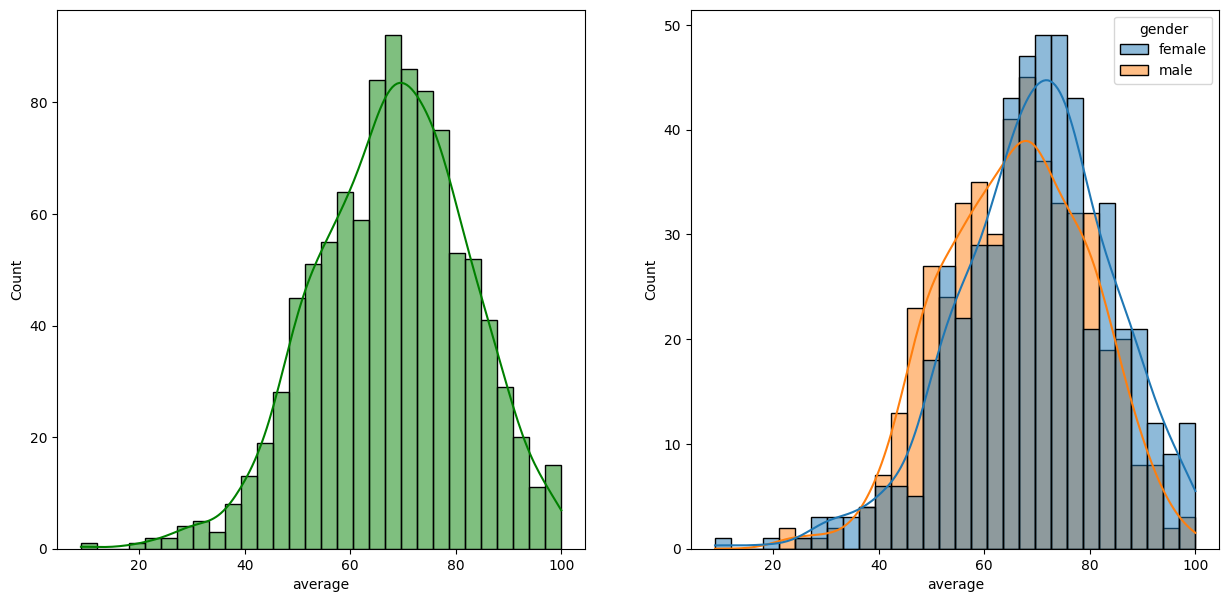

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

Female Students have performed well than the male students.

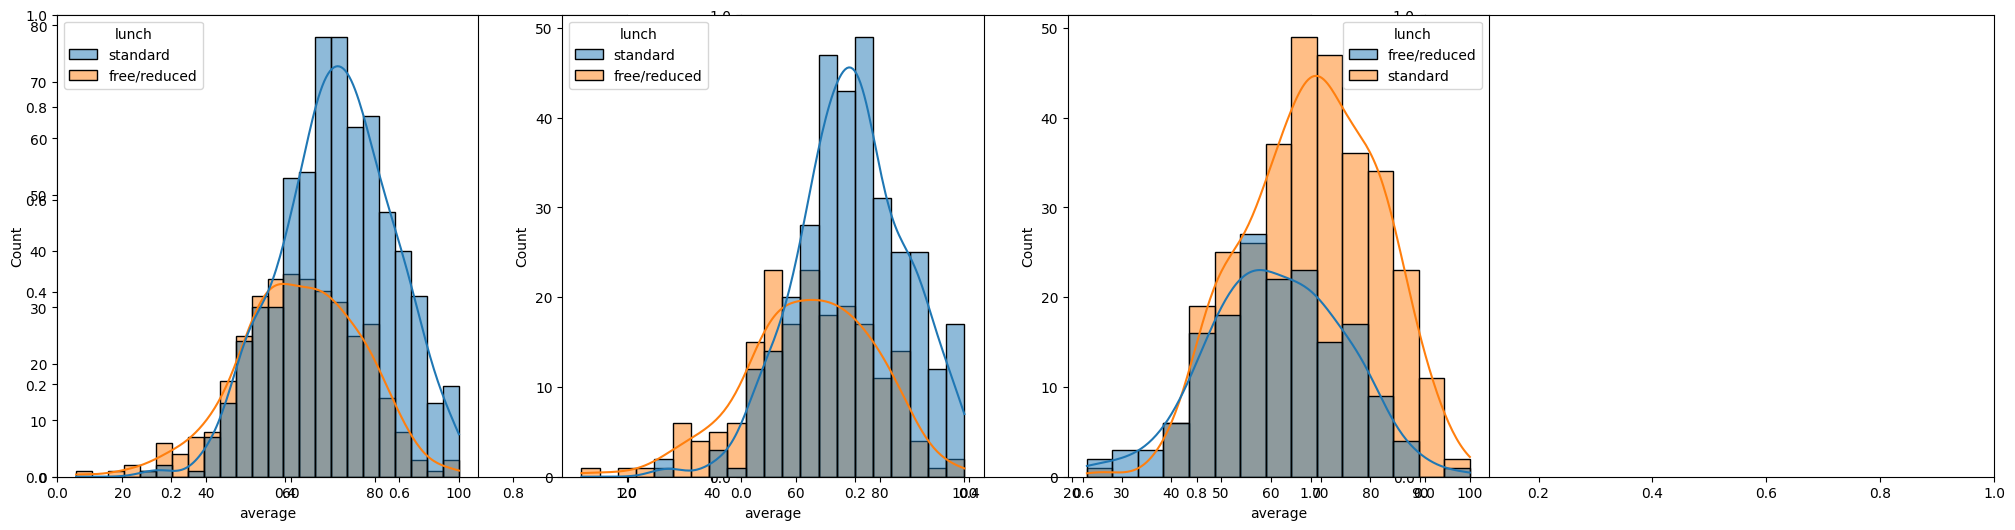

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

Standard Lunch helps perform better in exam
Standard lunch helps perform better in exam irrespective of gender.

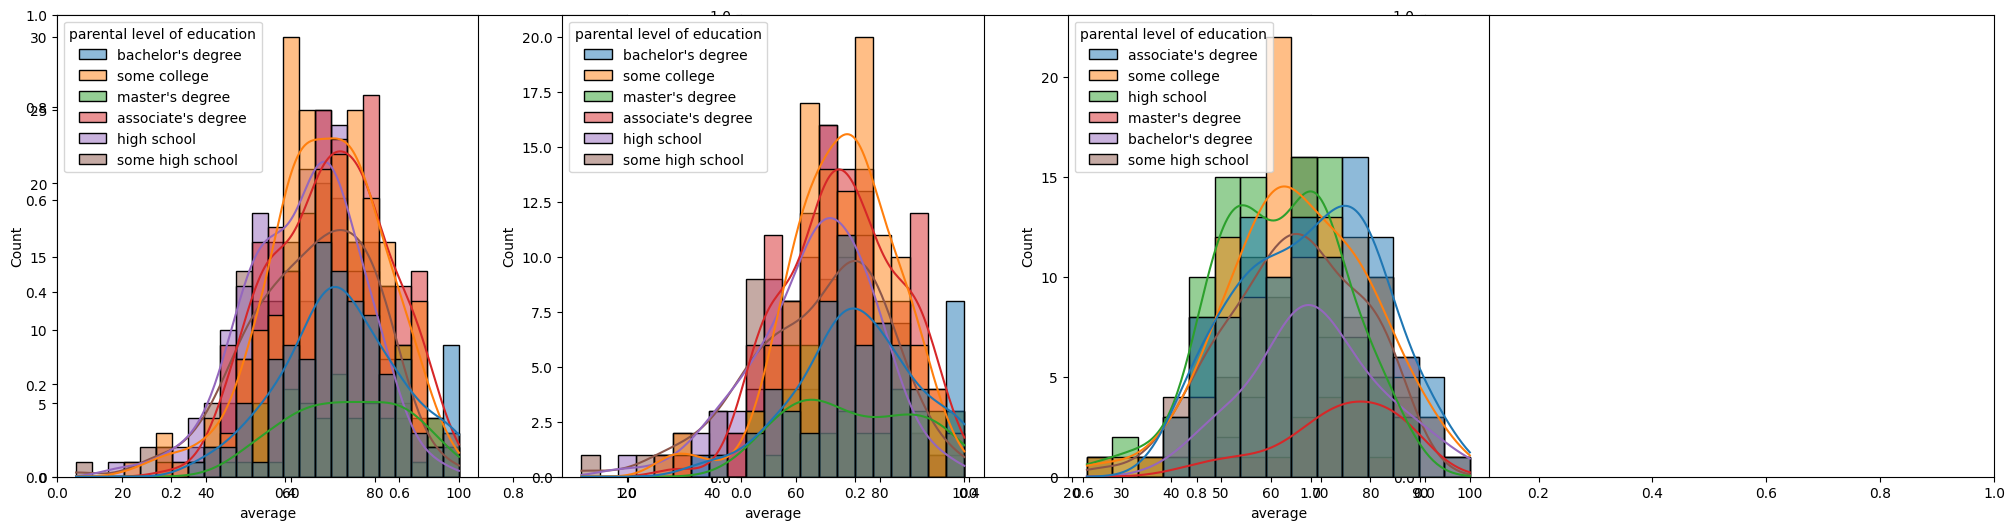

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.show()

The results shows that the student whose parents have been to a college are able to perform well in exams
But it is observes that students performance doesn't depends on parental level of education or having a particular degree in the education.

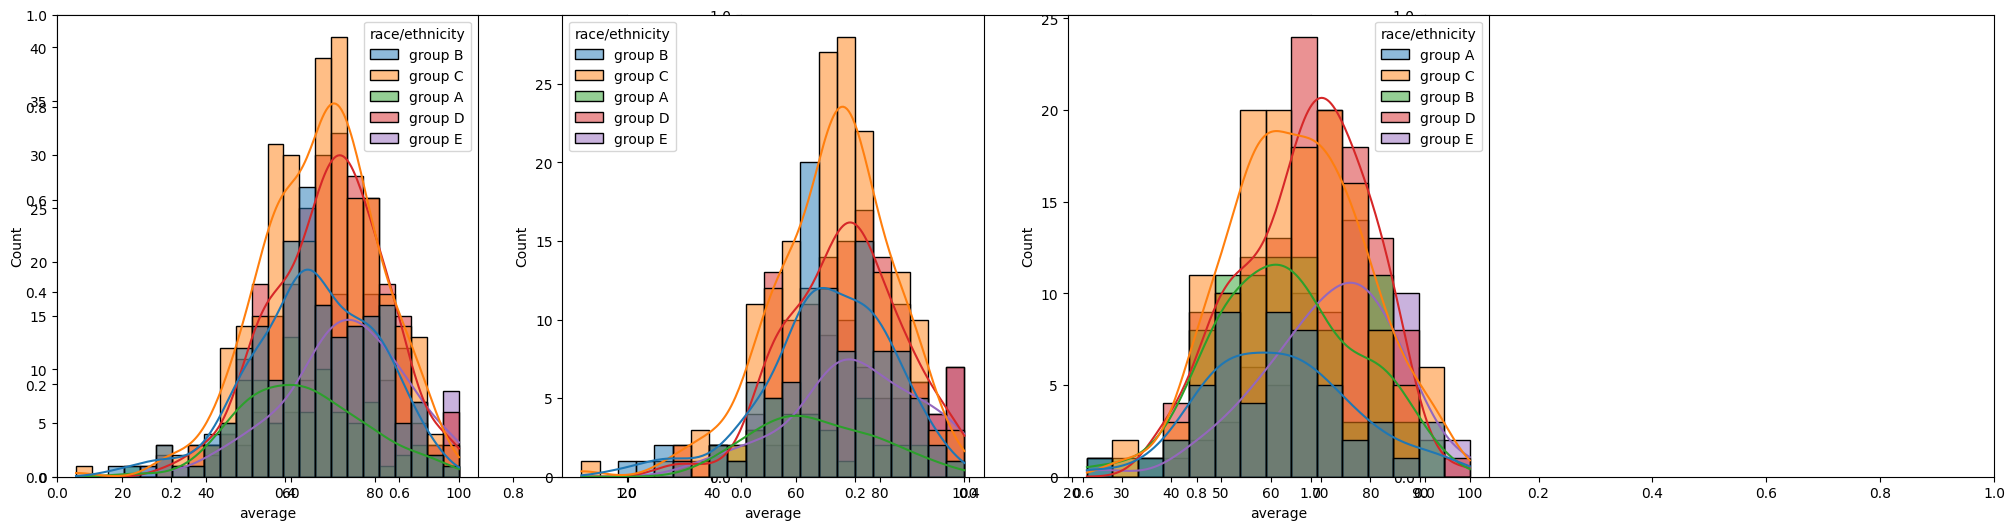

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')
plt.show()

Students belongs to Group C tends to perfrom better in exam.
In case of female student, Group D female students performs better in exam.

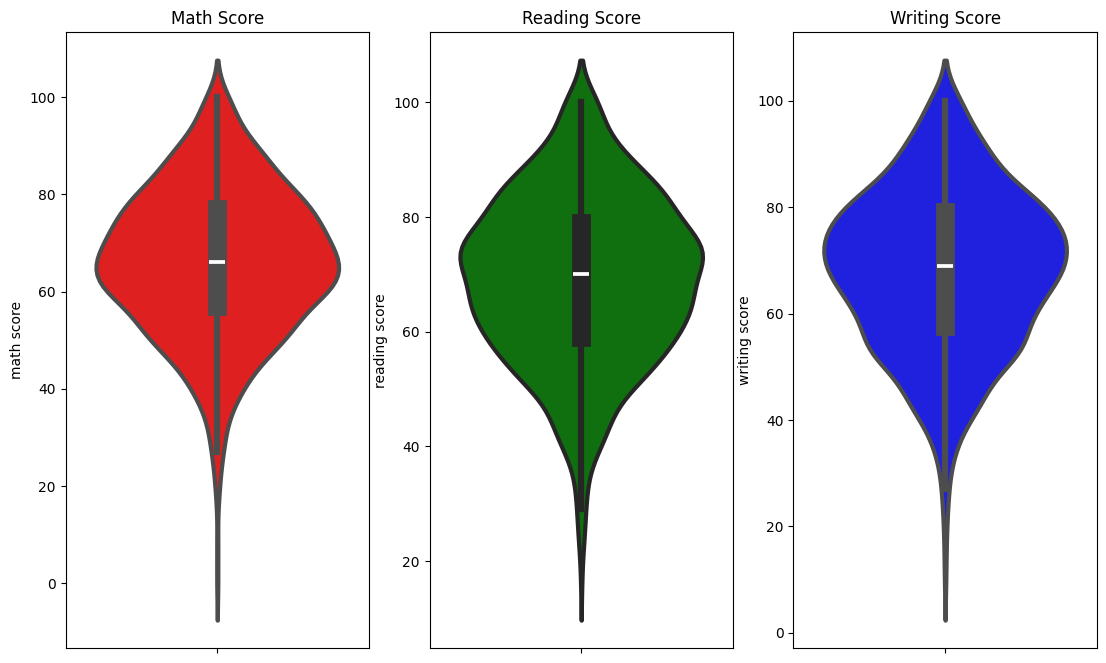

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

Most of the student marks lies between 60-80 in maths whereas for reading and writing the range is 50-80

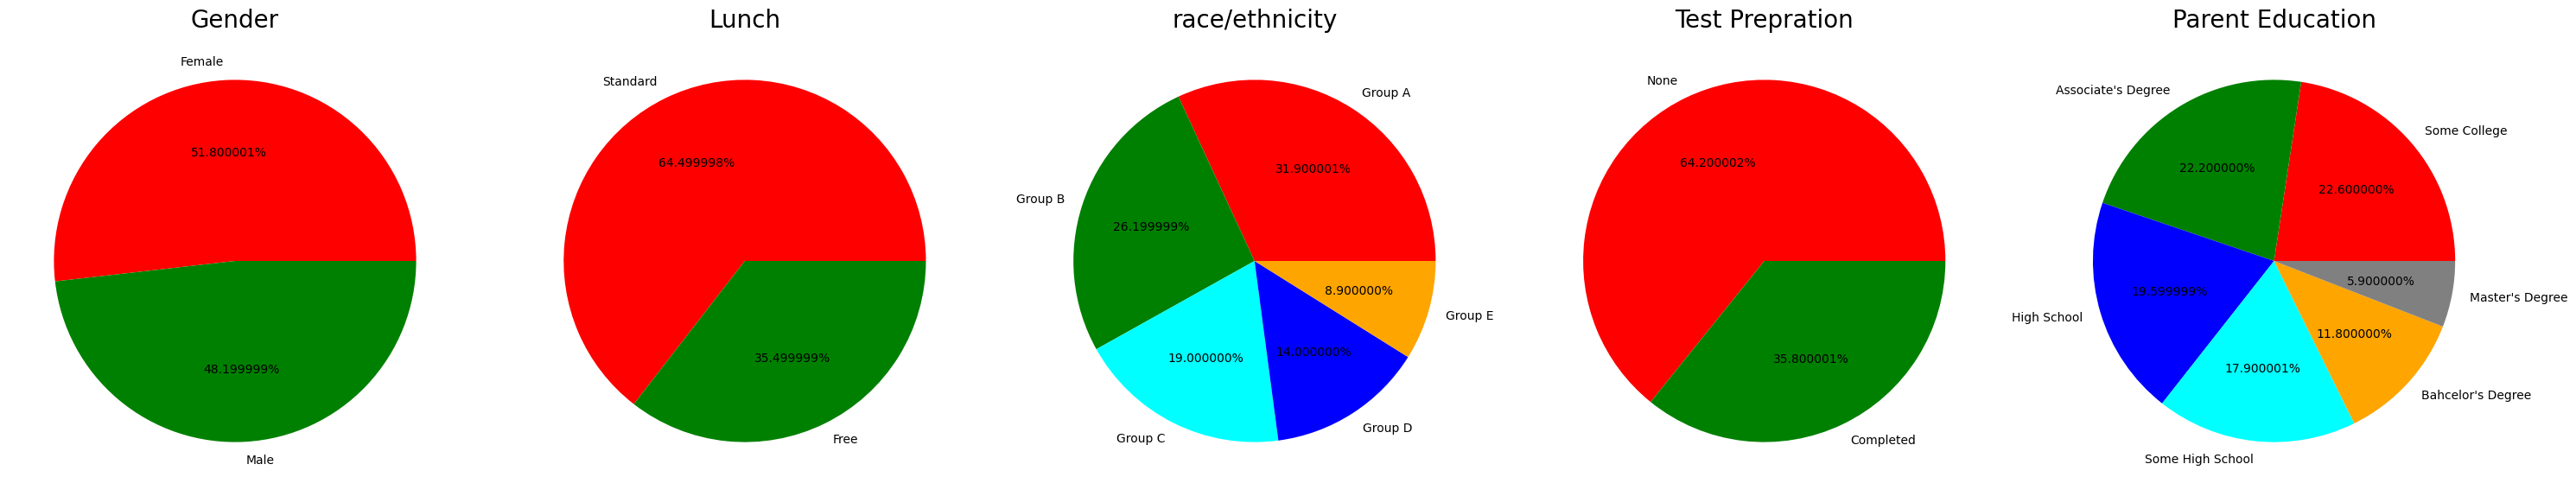

In [33]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', 'cyan', 'blue', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('race/ethnicity',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Test Prepration',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", "High School", "Some High School", "Bahcelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Parent Education',fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()